### Fill in group number and member names:

In [60]:
GROUP = "20"
NAME1 = "Sebastian Tufvesson"
NAME2 = "Theodor Anderberg Törngren"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

If our model is overparameterized then we have that the number of parameters, $n + 1$, is greater than the points, $N$, that we are tasked to fit, therefore it is case 1.

If our model is underparameterized then we have that the number of parameters, $n + 1$, is too few parameters to fit the $N$ points, therefore it is case 2.


---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

We start by finding the gradient of the individual functions $f_i = (\theta^{T}\phi(x_{i}))^2$ its gradient (with respect to the weights $\theta$) is the following: 

\begin{align*}
    \nabla f_i(\theta) = \nabla ((\theta^{T} \phi(x_{i}) - y_i)^2) = 2 ( \theta^{T} \phi(x_{i}) - y_i) \phi(x_{i}) 
\end{align*}

Using the definiton of $f(\theta) = \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} $ gives the following expression for $\nabla f(\theta)$: 

\begin{align*}
    \nabla f(\theta) & = \nabla (\frac{1}{N} (X\theta - Y)^T (X\theta - Y) ) \\
                     & = \nabla (\frac{1}{N} (\theta^T X^T X \theta - 2 \theta^T X^T Y + Y^T Y)) \\
                     & = \frac{2}{N} X^T(X\theta - Y) \\
\end{align*}

The calculated expression for $\nabla f(\theta)$ is used to calculate the following expression for the Hessian $\nabla^2 f(\theta)$:

\begin{align*}
    \nabla^2 f(\theta) = \nabla^T (\frac{2}{N} X^T(X\theta - Y)) = \frac{2}{N} X^T X
\end{align*}




---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align}
    \nabla f (\theta^{*}) = 0.
\end{align}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

Considering the aforementioned characteristics that $f$ is convex and differentiable we have that a minimizer, $\theta^\ast$, exist which proves the first condition.

Taking the derived expression for $\nabla f (\theta) = \frac{2}{N} X^T (X \theta - Y)$ we set the expression equal to 0:

\begin{align*}
    0 & = \frac{2}{N} X^T (X \theta^\ast - Y) \\
    \frac{2}{N} X^T Y  & =  \frac{2}{N} X^T X \theta^\ast \\
    (X^T X)^{-1} X^T Y & = \theta^\ast \\
\end{align*}

The calculations above hold due to $\exists \; (X^T X)^{-1}$ (according to case 2 in Exercise 1's description), and the equality implies that $\theta^\ast$ takes a singular value, thus being unique and proving the second condition.

To find an expression for $f(\theta^{*})$ we insert the found expression for $\theta^\ast$ into $f$:

\begin{align*}
    f(\theta^\ast) & = \frac{1}{N} \left\lVert X\theta^\ast - Y \right\rVert_{2}^{2} \\
                   & = \frac{1}{N} \left\lVert X((X^T X)^{-1} X^T Y) - Y \right\rVert_{2}^{2}
\end{align*}

---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

We start by proving that if  $\theta^{*}$ is a solution to the least squares problem (i.e. $\nabla f(\theta^\ast) = 0$, then $X\theta^{*} = Y$:

\begin{align*}
    0 & = X^T X \theta^\ast - X^T Y \\
      & = X^T (X \theta^\ast -Y) \\
      & = X \theta^\ast - Y
\end{align*}

To prove equivalence we also prove that if $X\theta^{*} = Y$ (and by extent $\theta^\ast = X^{-1}Y$), then $\theta^{*}$ is a solution to the least squares problem:

\begin{align*}
    \nabla f(\theta^\ast) & = \frac{2}{N} (X^T X \theta^\ast - X^T Y) \\
                          & = \frac{2}{N} (X^T X X^{-1}Y - X^T Y) \\
                          & = \frac{2}{N} (X^T Y - X^T Y) \\
                          & = 0
\end{align*}

Which proves that $\theta^\ast$ solves the least squares problem, and we have equivalence.

To prove that the set $\Theta^{*}$ is affine we note that the problem is overparameterized and results in an underdetermined linear set of equations: $X\theta = Y$. We know that these equations have solutions in form of hyperplanes and thereby the set $\Theta^\ast$ is affine.

---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.

__Solution:__ 

To show that $\hat\theta + \alpha v$ is a solution to the least squares problem we plug this into the expression for solutions to the least squares problem giving: 

\begin{align*}
    X(\hat\theta + \alpha v) = X\hat\theta +  \alpha X v = Y + 0 = Y 
\end{align*}

And therefore $\hat\theta + \alpha v$ is also a solution to the least squares problem. For showing the case where $\alpha = 1$, the proof follows the same steps. 

To show that the sets $\Theta^{*} = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. We start by picking any point $\theta^* \in \Theta^{*}$, we can rewrite this to $\theta^* + 0$ and since it always holds that $0 \in \mathcal{N}(X)$. We also note that $\theta^*$ by definiton conforms to the requirements of $\hat\theta$ in $\{\hat\theta + v : v\in\mathcal{N}(X) \}.$ Therefore: $\theta^* = \theta^* + 0 \in \{\hat\theta + v : v\in\mathcal{N}(X) \}.$ We can therefore conclude that $\Theta^{*} \subseteq \{\hat\theta + v : v\in\mathcal{N}(X) \}$ 

To prove that $\{\hat\theta + v : v\in\mathcal{N}(X) \} \subseteq  \Theta^{*}$ we take any point $a \in \{\hat\theta + v : v\in\mathcal{N}(X) \}$ and show that: 

\begin{align*}
    Xa = X\hat\theta + Xv = Y + 0 = Y 
\end{align*}

And therefore $a \in \Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \} \subseteq  \Theta^{*}$ which implies that $\{\hat\theta + v : v\in\mathcal{N}(X) \} = \Theta^{*}$

---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

It is due to $X^T X$ might not be inversible, and therefore we cannot derive an expression for $\theta^\ast$.

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__ 

Using the optimality conditions and inserting $X\theta^\ast = Y$ into the first condition we get:

$$
\begin{align*}
     0 & = \theta^{*} - a + X^{T}\lambda^\ast \\
     X 0 & = X (\theta^{*} - a + X^{T}\lambda^\ast) \\
     0 & = Y - X a + X X^T\lambda^\ast \\
     X a - Y & = X X^T \lambda^\ast \\
     (X X^T)^{-1}(X a - Y) & = \lambda^\ast
\end{align*}
$$

This holds due to $\exists \; (X X^T)^{-1}$ for the overparameterized problem. Using the found expression for $\lambda^\ast$ in optimality condition 1 we get an expression for $\theta^\ast$:

$$
\begin{align*}
    0 & = \theta^{*} - a + X^{T}\lambda^\ast \\
    0 & = \theta^{*} - a + X^{T}(X X^T)^{-1}(X a - Y) \\
    a - X^{T}(X X^T)^{-1}(X a - Y) & = \theta^\ast
\end{align*}
$$

which is what we wanted to show.

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

Using that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

we find:

$$
\begin{align}
    ||\nabla f(\theta_1) - \nabla f(\theta_2)||_2 & = ||\frac{2}{N}(X^T X \theta_1 - X^TY - X^TX \theta_2 + X^T Y||_2 \\
                                                  & = ||\frac{2}{N}(X^T X (\theta_1 - \theta_2) ||_2 \\
                                                  & \leq \frac{2}{N} ||X^T X ||_2 \; || (\theta_1 - \theta_2) ||_2 \\
                        \frac{2}{N} ||X^T X ||_2  \; || (\theta_1 - \theta_2) ||_2 & \leq \beta  \; || (\theta_1 - \theta_2) ||_2 \\
                         \frac{2}{N} ||X^T X ||_2 & \leq \beta \\
                                      \beta_{min} & = \frac{2}{N} ||X^T X ||_2
\end{align}
$$
which is what we wanted to show.

---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

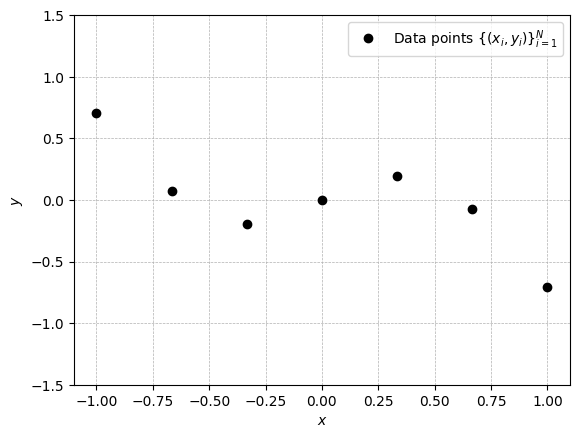

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

_Fill in your solution here!_

In [4]:
def get_model(n, xs, ys):
    X = []
    for x_i in xs:
        x_row = []
        for i in range(0, n+1):
            x_row.append(x_i**i)
        X.append(x_row)
    return np.array(X), np.array(ys)

def F(X, Y, theta):
    N = X.shape[0]
    return 1/N * np.linalg.norm(X @ theta - Y, ord=2)**2

def grad_F(X, Y, theta):
    N = X.shape[0]
    return 2/N * ((X.T @ X @ theta) - X.T @ Y)

def get_smoothness_constant(X):
    N = X.shape[0]
    return 2/N * np.linalg.norm(X.T @ X, ord=2)

def get_theta_bar(k, theta_bar_prev, new_theta):
    return 1/(k) * (theta_bar_prev*(k-1) + new_theta)  

def gradient_descent(step_size, max_steps, theta_0, X, Y):
    theta = theta_0
    theta_bar_evals = []
    f_evals = []
    for i in range(max_steps):
        theta = theta - step_size * grad_F(X, Y, theta)
        f_evals.append(F(X, Y, theta))

        if i == 0:
            theta_bar = theta
        else:
            theta_bar = get_theta_bar(i+1, theta_bar, theta)
        
        theta_bar_evals.append(F(X, Y, theta_bar))
    
    return theta, f_evals, theta_bar_evals

In [5]:
model_order = 3
X, Y = get_model(model_order, xs, ys)
# Solving the problem analytically:
N = X.shape[0]
arg = X @ (np.linalg.inv(X.T @ X) @ X.T @ Y) - Y
f_min_under = 1/N * np.linalg.norm(arg, ord=2)**2

# Solving the problem with GD
theta_0 = np.zeros(model_order+1)
step_size = 1/get_smoothness_constant(X)
theta_final_under, f_evals_under, f_theta_bars_under = gradient_descent(step_size, 10**5, theta_0, X, Y)

In [6]:
model_order = 9
X, Y = get_model(model_order, xs, ys)
# Solving the problem analytically:
f_min_over = 0

# Solving the problem with GD
theta_0 = np.zeros(model_order+1)
step_size = 1/get_smoothness_constant(X)
theta_final_over, f_evals_over, f_theta_bars_over = gradient_descent(step_size, 10**5, theta_0, X, Y)

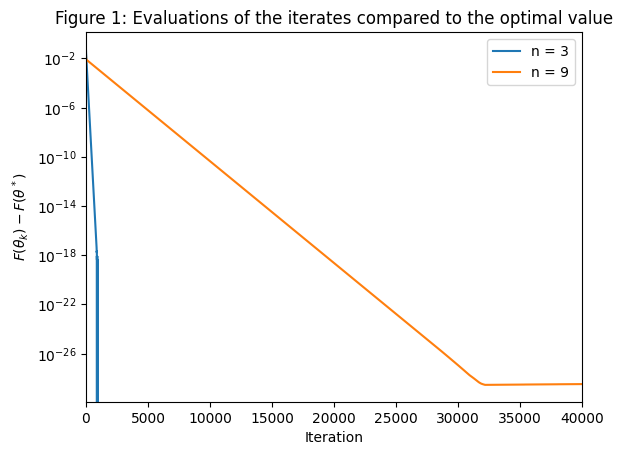

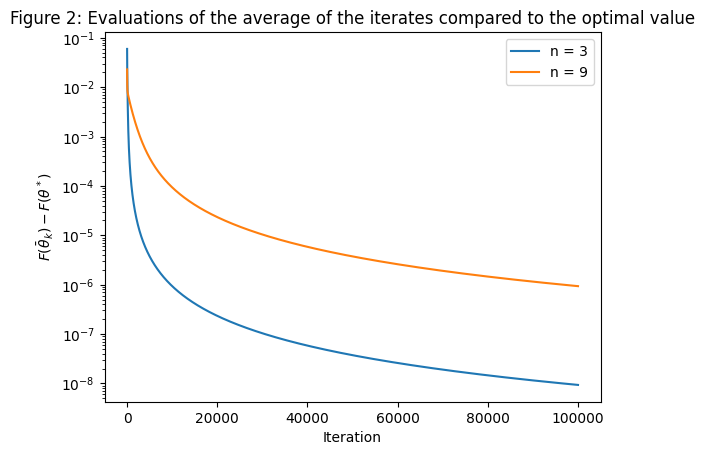

In [7]:
# Plotting the results:
plt.figure()
plt.title('Figure 1: Evaluations of the iterates compared to the optimal value')
plt.plot(f_evals_under - f_min_under, label='n = 3')
plt.plot(f_evals_over, label='n = 9')
plt.xlabel('Iteration')
plt.ylabel(r'$F(\theta_k) - F(\theta^*)$')
plt.yscale('log')
plt.legend()
plt.xlim([0, 40000])

plt.figure()
plt.title('Figure 2: Evaluations of the average of the iterates compared to the optimal value')
plt.plot(f_theta_bars_under - f_min_under, label='n = 3')
plt.plot(f_theta_bars_over, label='n = 9')
plt.xlabel('Iteration')
plt.ylabel(r'$F(\bar\theta_k) - F(\theta^*)$')
plt.yscale('log')
plt.legend()

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

_Fill in your solution here!_

In [8]:
def grad_F_i(X, Y, theta, i):
    return 2 * (theta.T @ X[i] - Y[i]) * X[i] 

def next_step_size(beta, k, variant):
    if variant == 1:
        return next_step_size_1(beta)
    if variant == 2:
        return next_step_size_2(beta, k)
    if variant == 3:
        return next_step_size_3(beta, k)

def next_step_size_1(beta):
    return 0.1/(beta)

def next_step_size_2(beta, k):
    return 0.1/(beta * (k+1))

def next_step_size_3(beta, k):
    return 0.1/(beta * (np.floor(k/1000) + 1))

def stochastic_gradient_descent(theta_0, X, Y, max_steps, step_size_variant):
    theta = theta_0
    theta_bar_evals = []
    f_evals = []
    beta = get_smoothness_constant(X)
    for i in range(max_steps):
        step_size = next_step_size(beta, i, variant=step_size_variant)
        index = np.random.randint(0, X.shape[0])
        theta = theta - step_size * grad_F_i(X, Y, theta, index)
        f_evals.append(F(X, Y, theta))

        if i == 0:
            theta_bar = theta
        else:
            theta_bar = get_theta_bar(i+1, theta_bar, theta)
        
        theta_bar_evals.append(F(X, Y, theta_bar))
    
    return theta, f_evals, theta_bar_evals

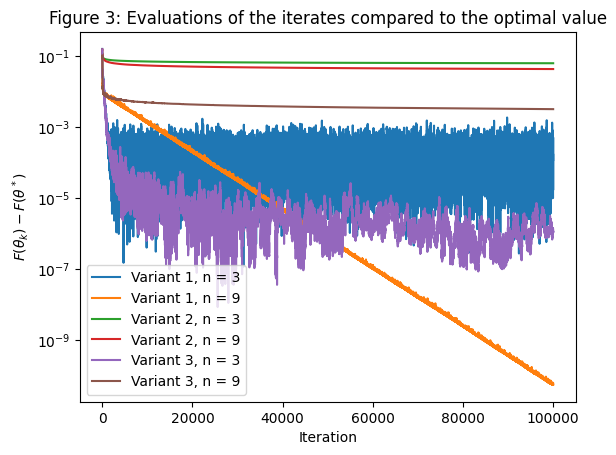

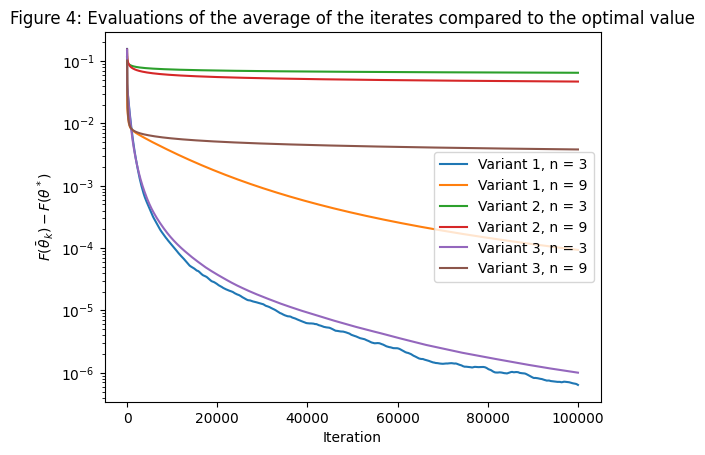

In [9]:
fig_latest, axis_latest = plt.subplots()
fig_average, axis_average = plt.subplots()

axis_latest.set_title('Figure 3: Evaluations of the iterates compared to the optimal value')
axis_latest.set_xlabel('Iteration')
axis_latest.set_ylabel(r'$F(\theta_k) - F(\theta^*)$')
axis_latest.set_yscale('log')

axis_average.set_title('Figure 4: Evaluations of the average of the iterates compared to the optimal value')
axis_average.set_xlabel('Iteration')
axis_average.set_ylabel(r'$F(\bar\theta_k) - F(\theta^*)$')
axis_average.set_yscale('log')

max_iter = 10**5
for step_size_variant in [1, 2, 3]:
    ### For n = 3
    model_order = 3
    X, Y = get_model(model_order, xs, ys)
    # Solving the problem analytically:
    N = X.shape[0]
    arg = X @ (np.linalg.inv(X.T @ X) @ X.T @ Y) - Y
    f_min_under = 1/N * np.linalg.norm(arg, ord=2)**2

    # Solving the problem with SGD
    theta_0 = np.zeros(model_order+1)
    theta_final_under, f_evals_under, f_theta_bars_under = stochastic_gradient_descent(theta_0, X, Y, max_iter, step_size_variant)
    
    ### For n = 9
    model_order = 9
    X, Y = get_model(model_order, xs, ys)
    # Solving the problem analytically:
    f_min_over = 0

    # Solving the problem with SGD
    theta_0 = np.zeros(model_order+1)
    theta_final_over, f_evals_over, f_theta_bars_over = stochastic_gradient_descent(theta_0, X, Y, max_iter, step_size_variant)

    # Plotting the results:
    axis_latest.plot(f_evals_under - f_min_under, label=f'Variant {step_size_variant}, n = 3')
    axis_latest.plot(f_evals_over, label=f'Variant {step_size_variant}, n = 9')
    axis_latest.legend()

    axis_average.plot(f_theta_bars_under - f_min_under, label=f'Variant {step_size_variant}, n = 3')
    axis_average.plot(f_theta_bars_over, label=f'Variant {step_size_variant}, n = 9')
    axis_average.legend()

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


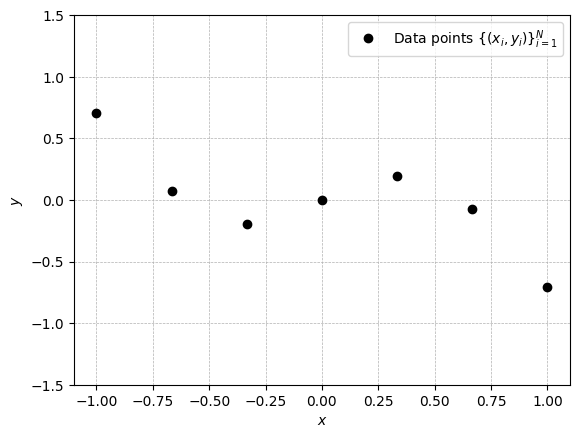

In [10]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

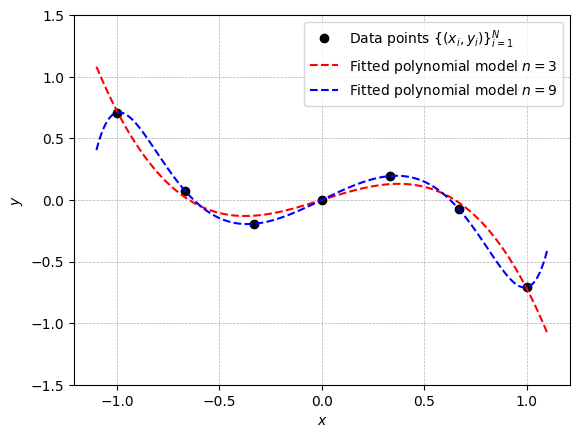

In [11]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [12]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [37]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [38]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [39]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [40]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.324186235666275
Epoch: 100	Loss: 0.06325642764568329
Epoch: 200	Loss: 0.057211119681596756
Epoch: 300	Loss: 0.0538456067442894
Epoch: 400	Loss: 0.05079237371683121
Epoch: 500	Loss: 0.047157932072877884
Epoch: 600	Loss: 0.042022641748189926
Epoch: 700	Loss: 0.03401414677500725
Epoch: 800	Loss: 0.025463972240686417
Epoch: 900	Loss: 0.017329158261418343
Epoch: 1000	Loss: 0.011333315633237362
Epoch: 1100	Loss: 0.00785906333476305
Epoch: 1200	Loss: 0.005635944660753012
Epoch: 1300	Loss: 0.004148463252931833
Epoch: 1400	Loss: 0.003100533038377762
Epoch: 1500	Loss: 0.0023301353212445974
Epoch: 1600	Loss: 0.0017499750247225165
Epoch: 1700	Loss: 0.0013089753920212388
Epoch: 1800	Loss: 0.0009739728993736207
Epoch: 1900	Loss: 0.00072051165625453


Below we plot trained model:

Traing loss: 0.00053


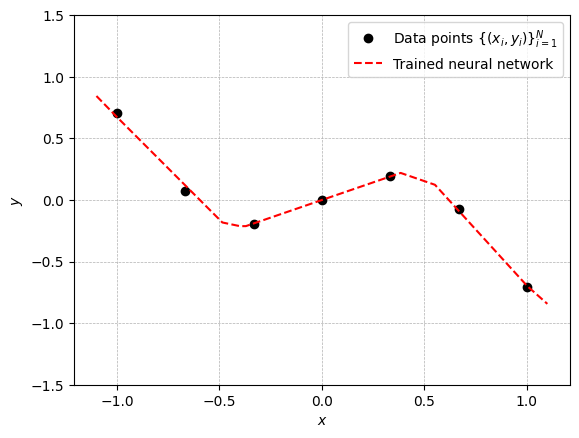

In [59]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

In [42]:
# Write your code here

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

In [43]:
# Write your code here

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

In [44]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Write your code here

linear1.weight tensor([[ 1.2663],
        [ 1.2514],
        [ 0.8428],
        [ 0.2547],
        [-0.9586],
        [-0.8419],
        [-0.2808],
        [-1.3199],
        [ 0.9814],
        [-0.2295]])
linear1.bias tensor([-0.6980, -0.4806,  0.3388, -0.6971,  0.9586, -0.8601, -0.8450, -0.6421,
         0.3653, -0.5260])
linear2.weight tensor([[-0.9914, -0.9143,  0.4051, -0.2198,  0.3722,  0.0633,  0.0947,  0.9919,
          0.5985, -0.2697]])
linear2.bias tensor([-0.7132])


__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

In [45]:
# Write your code here

__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

_Fill in your solution here!_

In [46]:
# Write your code here

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

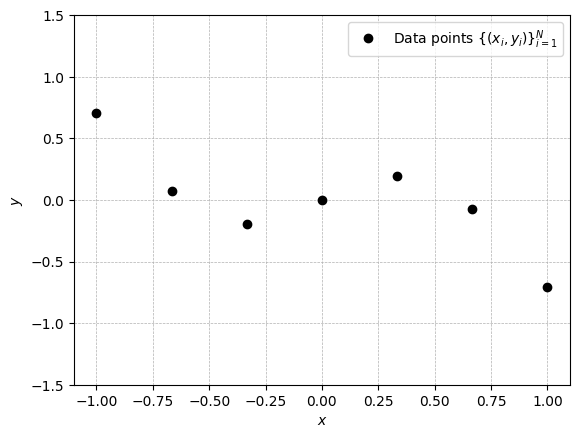

In [47]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

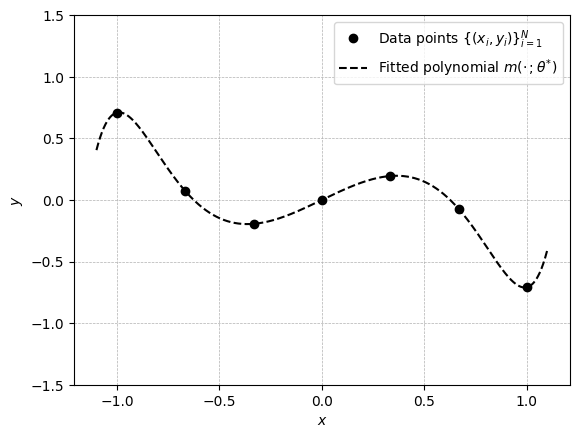

In [48]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

_Fill in your solution here!_

In [49]:
n = 9 # degree
a = np.random.randn(n + 1)

# Write your code here

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

_Fill in your solution here!_

In [50]:
# Write your code here

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


_Fill in your solution here!_

In [51]:
# Write your code here

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


_Fill in your solution here!_

In [52]:
# Write your code here

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [53]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

_Fill in your solution here!_

In [54]:
# Write your code here

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [55]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

_Fill in your solution here!_

In [56]:
# Write your code here

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

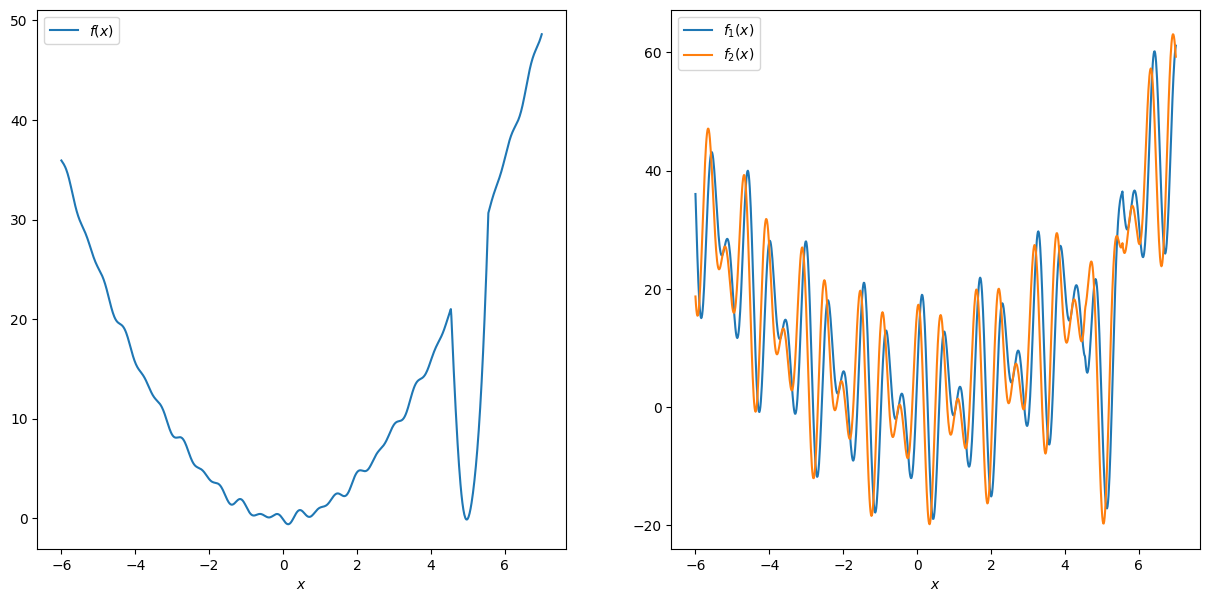

In [57]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

_Fill in your solution here!_

In [58]:
# Write your code here